In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import math

In [2]:
def setup_dataframes():
    df = pd.read_csv('MM_game_data.csv')
    df = df[df['YEAR'] >= 2013]
    df = df[df['YEAR'] <= 2023]
    np.unique(df['YEAR'])
    games = df.drop(['ROUND'], axis=1)
    
    df = pd.read_csv('cbb.csv')
    df = df[df['SEED'] > 0]
    df = df[df['YEAR'] <= 2021]
    teams = df.drop(['CONF', 'POSTSEASON', 'SEED'], axis=1)
    
    rv = np.floor(np.random.rand(len(games))*2)
    
    return (games,teams,rv)

In [3]:
def get_team_data(team, year):
    all_years = teams.loc[teams['TEAM'] == team]
    specific_year = all_years.loc[all_years['YEAR'] == year]
    return specific_year

In [4]:
def assemble_game_data():
    game_data = np.zeros(shape=(len(games), 38))
    for i in range(0,len(games)):
        wdata = get_team_data(games.iloc[i]['WTEAM'], games.iloc[i]['YEAR']).drop(['TEAM', 'YEAR'], axis=1)
        ldata = get_team_data(games.iloc[i]['LTEAM'], games.iloc[i]['YEAR']).drop(['TEAM', 'YEAR'], axis=1)
        if rv[i] == 0:
            game_data[i] = np.hstack([wdata, ldata])
        else:
            game_data[i] = np.hstack([ldata, wdata])
    return game_data

In [5]:
def assemble_response_data():
    score_diff = []
    for i in range(0,len(games)):
        if rv[i] == 0:
            score_diff.append(games.iloc[i]['WSCORE'] - games.iloc[i]['LSCORE'])
        else:
            score_diff.append(games.iloc[i]['LSCORE'] - games.iloc[i]['WSCORE'])
    return score_diff

In [6]:
def get_invalid_team_names():
    wrong_names = []

    for i in range(0,len(games)):
        wdata = get_team_data(games.iloc[i]['WTEAM'], games.iloc[i]['YEAR'])
        if wdata.empty:
            wrong_names.append(games.iloc[i]['WTEAM'])
        ldata = get_team_data(games.iloc[i]['LTEAM'], games.iloc[i]['YEAR'])
        if ldata.empty:
            wrong_names.append(games.iloc[i]['LTEAM'])
    return np.unique(wrong_names)

In [10]:
(games,teams,rv) = setup_dataframes()

In [18]:
game_data = assemble_game_data()
score_data = assemble_response_data()
X_train, X_test, y_train, y_test = train_test_split(game_data, score_data, test_size=0.2, random_state=1)

0.45462300943098244

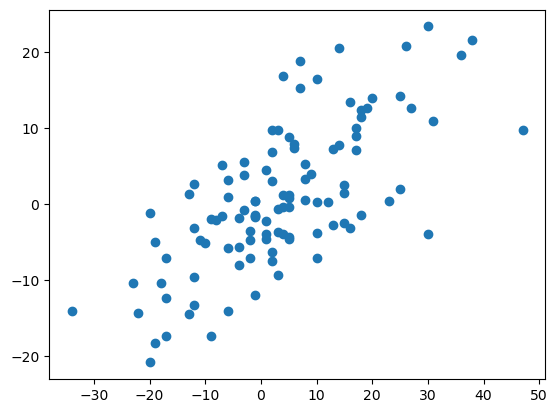

In [47]:
regr = MLPRegressor(random_state=1).fit(X_train, y_train)

pred = regr.predict(X_test)
plt.scatter(y_test, pred)
regr.score(X_test, y_test)

array([200., 206., 212., 218., 224., 230., 236., 242., 248., 254., 260.,
       266., 272., 278., 284., 290., 296., 302., 308., 314., 320., 326.,
       332., 338., 344., 350., 356., 362., 368., 374., 380., 386., 392.,
       398., 404., 410., 416., 422., 428., 434., 440., 446., 452., 458.,
       464., 470., 476., 482., 488., 494., 500.])